In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(context='talk',fscale=1.4, spines=False, gridlines="--",grid=False)

In [3]:
df = pd.read_csv('clean_df_train.csv')

In [7]:
pd.set_option('display.max_columns', 50)
df

,label,accuracy_max,accuracy_min,accuracy_avg,accuracy_range,longitude_max,longitude_min,longitude_avg,longitude_range,latitude_max,latitude_min,latitude_avg,latitude_range,altitude_max,altitude_min,altitude_avg,altitude_isnan,seconds_max,seconds_min,seconds_avg,seconds_range,date_nunique,hour_nunique,AVAILABLE,OTW_DROPOFF,OTW_PICKUP,UNAVAILABLE,GO_FOOD,GO_RIDE,pings
0,1,8.292,0.100,2.550590,8.192,0.000252,-0.001746,-3.138914e-06,-0.000694,0.000888,-0.009959,-2.551674e-05,-0.005639,8.400000,-18.000000,-0.241627,12.0,44.0,5.0,10.099548,2232,1,2,114.0,71.0,35.0,2.0,1,0,222
1,1,35.213,0.010,5.220178,35.203,0.001419,-0.000603,0.000000e+00,0.000000,0.007433,-0.000851,0.000000e+00,0.000000,8.000000,-9.000000,-0.124088,42.0,22.0,2.0,10.078212,1804,1,1,35.0,116.0,27.0,2.0,1,0,180
2,1,57.281,0.100,4.217635,57.181,0.000687,-0.000143,2.321062e-05,0.006778,0.010722,-0.000220,6.055000e-05,0.017681,49.000000,-16.900000,0.186986,0.0,24.0,6.0,10.092466,2947,1,2,5.0,75.0,211.0,2.0,1,0,293
3,0,23.848,3.900,4.906231,19.948,0.000587,-0.001027,-1.399155e-04,-0.016230,0.000963,-0.000668,7.847845e-05,0.009104,21.400000,-16.400000,0.169827,0.0,46.0,4.0,11.146552,1293,1,1,53.0,5.0,59.0,0.0,1,0,117
4,1,10.506,0.500,2.651331,10.006,0.001580,-0.010067,-1.461538e-06,-0.000171,0.000842,-0.007496,7.521368e-07,0.000088,11.722839,-14.167725,-0.006762,57.0,78.0,1.0,12.888889,1508,1,1,37.0,64.0,16.0,1.0,1,0,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,13.619,4.321,6.518141,9.298,0.003268,-0.000668,1.057394e-04,0.026858,0.000625,-0.000777,-5.070276e-05,-0.012878,36.200000,-24.800000,-0.320472,0.0,66.0,2.0,10.232283,2599,1,1,75.0,102.0,78.0,0.0,0,1,255
3496,0,190.989,3.000,8.617922,187.989,0.001148,-0.002275,-2.810458e-08,-0.000004,0.004499,-0.001033,2.660131e-07,0.000041,19.000000,-53.000000,-0.084967,0.0,109.0,7.0,11.457516,1753,1,2,120.0,10.0,24.0,0.0,0,1,154
3497,0,1100.000,4.000,26.659064,1096.000,0.001095,-0.002833,-1.932037e-04,-0.021059,0.000948,-0.002620,-1.071367e-04,-0.011678,50.000000,-36.000000,-0.814433,8.0,31.0,1.0,12.770642,1392,1,1,23.0,70.0,17.0,0.0,0,1,110
3498,0,65.165,3.000,4.209821,62.165,0.001027,-0.000739,3.264433e-06,0.000633,0.000853,-0.001005,-3.722526e-05,-0.007222,30.900000,-32.300000,-0.044503,2.0,32.0,4.0,10.097938,1959,1,2,115.0,51.0,28.0,1.0,0,1,195


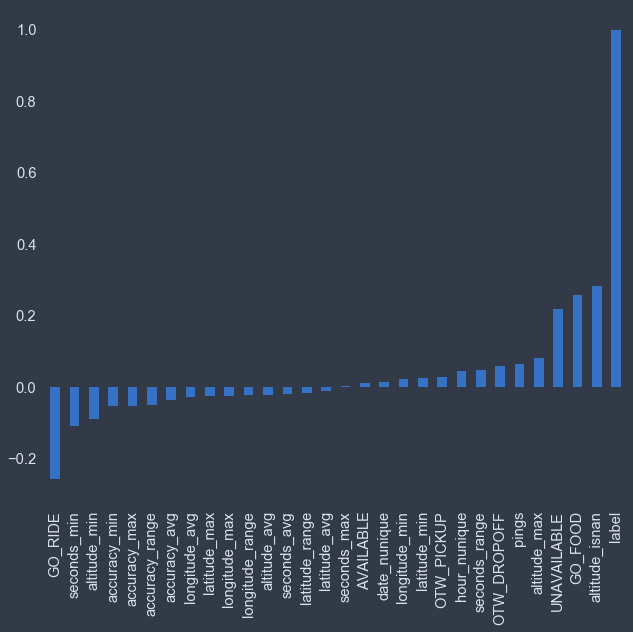

In [8]:
df.corr()['label'].sort_values().plot(kind='bar')

In [9]:
from pycaret.classification import *

In [10]:
source=setup(data = df, target = 'label', session_id=101)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,101
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(3500, 30)"
4,Missing Values,False
5,Numeric Features,25
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [25]:
compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.817100,0.888400,0.871600,0.869100,0.870100,0.560400
1,CatBoost Classifier,0.816200,0.890400,0.874000,0.866100,0.869800,0.557400
2,Light Gradient Boosting Machine,0.813400,0.886400,0.876300,0.861300,0.868500,0.546900
3,Gradient Boosting Classifier,0.813800,0.887300,0.872200,0.864400,0.868000,0.551500
4,Extra Trees Classifier,0.800700,0.866600,0.879200,0.844100,0.861100,0.508800
5,Ada Boost Classifier,0.795800,0.864100,0.858900,0.852300,0.855200,0.508400
6,Random Forest Classifier,0.791800,0.854200,0.832200,0.866900,0.848900,0.514100
7,Logistic Regression,0.735400,0.789600,0.918100,0.757800,0.830000,0.255900
8,Ridge Classifier,0.731300,0.000000,0.916400,0.754600,0.827500,0.244400
9,Linear Discriminant Analysis,0.733800,0.807600,0.895400,0.766000,0.825500,0.277500


In [26]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8327,0.9074,0.8895,0.8743,0.8818,0.5952
1,0.8163,0.8911,0.8605,0.8757,0.8680,0.5661
2,0.8163,0.9045,0.8430,0.8896,0.8657,0.5760
3,0.8122,0.8921,0.8663,0.8663,0.8663,0.5512
4,0.7959,0.8406,0.8372,0.8675,0.8521,0.5235
5,0.8367,0.9024,0.8953,0.8750,0.8851,0.6035
6,0.7755,0.8688,0.8721,0.8197,0.8451,0.4391
7,0.8163,0.8916,0.8671,0.8721,0.8696,0.5592
8,0.8571,0.9069,0.9017,0.8966,0.8991,0.6544
9,0.8115,0.8784,0.8837,0.8539,0.8686,0.5356


In [14]:
print(xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)


In [27]:
tuned_xgboost = tune_model('xgboost',optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8163,0.8755,0.9012,0.8470,0.8732,0.5411
1,0.8286,0.8871,0.8547,0.8963,0.8750,0.6028
2,0.7796,0.8631,0.8023,0.8734,0.8364,0.5007
3,0.7796,0.8275,0.8663,0.8278,0.8466,0.4560
4,0.7796,0.8396,0.8372,0.8471,0.8421,0.4773
5,0.8163,0.8517,0.9012,0.8470,0.8732,0.5411
6,0.7714,0.8151,0.8779,0.8118,0.8436,0.4217
7,0.8204,0.8770,0.8786,0.8686,0.8736,0.5637
8,0.8204,0.8838,0.8497,0.8909,0.8698,0.5809
9,0.7582,0.8031,0.8430,0.8192,0.8309,0.4068


In [28]:
print(tuned_xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.79, max_delta_step=0, max_depth=60,
              min_child_weight=4, missing=None, n_estimators=900, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=0)


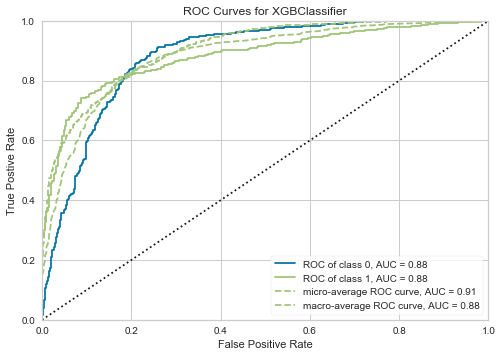

In [29]:
plot_model(xgboost, plot = 'auc')

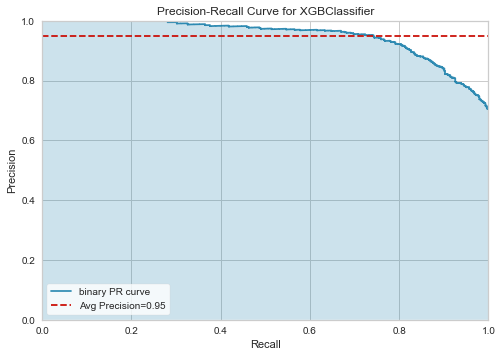

In [30]:
plot_model(xgboost, plot = 'pr')

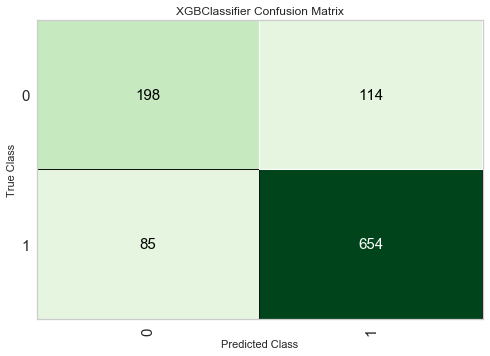

In [31]:
plot_model(xgboost, plot = 'confusion_matrix')

In [32]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [33]:
final_model = finalize_model(xgboost)
predict_model(final_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.8716,0.9334,0.9053,0.9114,0.9084,0.6937


In [34]:
test=pd.read_csv('clean_df_test.csv')
test

,order_id,GO_FOOD,GO_RIDE,accuracy_max,accuracy_min,accuracy_avg,accuracy_range,longitude_max,longitude_min,longitude_avg,...,seconds_min,seconds_avg,seconds_range,date_nunique,hour_nunique,AVAILABLE,OTW_DROPOFF,OTW_PICKUP,UNAVAILABLE,pings
0,F10,1,0,126.941,3.000,16.184113,123.941,0.002044,-0.001907,-0.000036,...,4.0,11.077381,3722,1,2,27.0,215.0,95.0,0.0,337
1,F1008,1,0,96.000,3.000,8.576711,93.000,0.001022,-0.000410,0.000098,...,5.0,10.427481,2732,1,2,2.0,183.0,78.0,0.0,263
2,F1011,1,0,84.167,3.000,15.411171,81.167,0.008598,-0.008599,-0.000111,...,3.0,10.594828,1229,1,2,73.0,0.0,42.0,2.0,117
3,F1022,1,0,27.027,0.010,2.181779,27.017,0.000458,-0.000582,-0.000018,...,1.0,10.809028,3113,1,2,59.0,99.0,131.0,0.0,289
4,F103,1,0,21.033,0.010,2.059322,21.023,0.001282,-0.012419,-0.000144,...,1.0,14.465116,1244,1,2,17.0,25.0,41.0,4.0,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RB926,0,1,38.128,4.524,7.580852,33.604,0.001152,-0.000733,0.000035,...,4.0,9.943396,527,1,1,13.0,24.0,17.0,0.0,54
496,RB928,0,1,35.305,3.000,4.173120,32.305,0.000612,-0.001567,-0.000088,...,2.0,10.022321,2245,1,2,49.0,137.0,39.0,0.0,225
497,RB955,0,1,6.500,3.000,4.232119,3.500,0.000458,-0.001827,-0.000020,...,8.0,16.400000,1640,1,1,21.0,0.0,80.0,0.0,101
498,RB976,0,1,14.026,0.010,3.118054,14.016,0.002901,-0.002019,0.000012,...,1.0,11.967391,2202,1,1,57.0,91.0,33.0,4.0,185


In [35]:
new_prediction = predict_model(final_model, data=test)
new_prediction

,order_id,GO_FOOD,GO_RIDE,accuracy_max,accuracy_min,accuracy_avg,accuracy_range,longitude_max,longitude_min,longitude_avg,...,seconds_range,date_nunique,hour_nunique,AVAILABLE,OTW_DROPOFF,OTW_PICKUP,UNAVAILABLE,pings,Label,Score
0,F10,1,0,126.941,3.000,16.184113,123.941,0.002044,-0.001907,-0.000036,...,3722,1,2,27.0,215.0,95.0,0.0,337,0,0.3504
1,F1008,1,0,96.000,3.000,8.576711,93.000,0.001022,-0.000410,0.000098,...,2732,1,2,2.0,183.0,78.0,0.0,263,1,0.5605
2,F1011,1,0,84.167,3.000,15.411171,81.167,0.008598,-0.008599,-0.000111,...,1229,1,2,73.0,0.0,42.0,2.0,117,0,0.4685
3,F1022,1,0,27.027,0.010,2.181779,27.017,0.000458,-0.000582,-0.000018,...,3113,1,2,59.0,99.0,131.0,0.0,289,1,0.9812
4,F103,1,0,21.033,0.010,2.059322,21.023,0.001282,-0.012419,-0.000144,...,1244,1,2,17.0,25.0,41.0,4.0,87,1,0.9965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RB926,0,1,38.128,4.524,7.580852,33.604,0.001152,-0.000733,0.000035,...,527,1,1,13.0,24.0,17.0,0.0,54,0,0.3607
496,RB928,0,1,35.305,3.000,4.173120,32.305,0.000612,-0.001567,-0.000088,...,2245,1,2,49.0,137.0,39.0,0.0,225,0,0.4070
497,RB955,0,1,6.500,3.000,4.232119,3.500,0.000458,-0.001827,-0.000020,...,1640,1,1,21.0,0.0,80.0,0.0,101,0,0.3672
498,RB976,0,1,14.026,0.010,3.118054,14.016,0.002901,-0.002019,0.000012,...,2202,1,1,57.0,91.0,33.0,4.0,185,1,0.9917


In [40]:
new_prediction=new_prediction[['order_id','Label']]
new_prediction = new_prediction.rename(columns={'Label': 'label'}) 
new_prediction

,order_id,label
0,F10,0
1,F1008,1
2,F1011,0
3,F1022,1
4,F103,1
...,...,...
495,RB926,0
496,RB928,0
497,RB955,0
498,RB976,1


In [41]:
new_prediction.to_csv(r'jawaban.csv', index = False)
